## **MNIST Character Recognition**

### 1: Load Tensorflow





In [8]:
import tensorflow as tf

### 2: Load MNIST Dataser and convert sames to floating point number from integers

In [6]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### 3: Build the model

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### 4: Outputs - Vectors

In [13]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.59788924,  0.05351429,  0.84590805,  0.41338697,  0.44640702,
        -0.42197394,  0.09887154, -0.34708273, -0.01146778, -0.59155923]],
      dtype=float32)

### 5: Probability of each class intead of the vectors

In [14]:
tf.nn.softmax(predictions).numpy()

array([[0.04991508, 0.09574868, 0.2114779 , 0.13722192, 0.14182863,
        0.0595156 , 0.10019156, 0.06414395, 0.08972457, 0.05023205]],
      dtype=float32)

### 6: Finding the scalar loss of each example

In [15]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [16]:
loss_fn(y_train[:1], predictions).numpy()

2.8215168

### 7: Model Compilation

In [18]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

### 8: Model Fitting

In [21]:
model.fit(x_train, y_train, epochs = 25)

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9803 - loss: 0.0635
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9825 - loss: 0.0570
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9822 - loss: 0.0561
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9853 - loss: 0.0440
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9857 - loss: 0.0417
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9865 - loss: 0.0396
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9890 - loss: 0.0339
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9881 - loss: 0.0351
Epoch 9/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9898 - loss: 0.0316
Epoch 10/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9892 - loss: 0.0310
Epoch 11/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9904 - loss: 0.0283
Epoch 12/25
1875/1875 ━━━

### 9: Model Evaluation

In [22]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9828 - loss: 0.0830


[0.08295060694217682, 0.9828000068664551]

### 10: Testing images

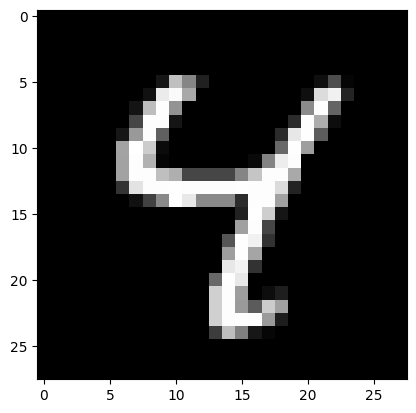

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: 4


In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Choose an image index from the test set
image_index = 6  # Change this index to select a different image
single_image = x_test[image_index]

# Display the image
plt.imshow(single_image, cmap='gray')
plt.show()

# Prepare the image for the model by adding an extra dimension
single_image = np.expand_dims(single_image, axis=0)

# Predict the class of the selected image
predictions = model.predict(single_image)

# Find the class with the highest probability
predicted_class = np.argmax(predictions[0])

print(f'Predicted class: {predicted_class}')


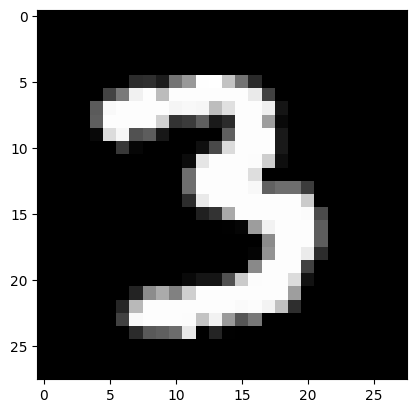

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted class: 3


In [28]:
# Choose an image index from the test set
image_index = 500  # Change this index to select a different image
single_image = x_test[image_index]

# Display the image
plt.imshow(single_image, cmap='gray')
plt.show()

# Prepare the image for the model by adding an extra dimension
single_image = np.expand_dims(single_image, axis=0)

# Predict the class of the selected image
predictions = model.predict(single_image)

# Find the class with the highest probability
predicted_class = np.argmax(predictions[0])

print(f'Predicted class: {predicted_class}')


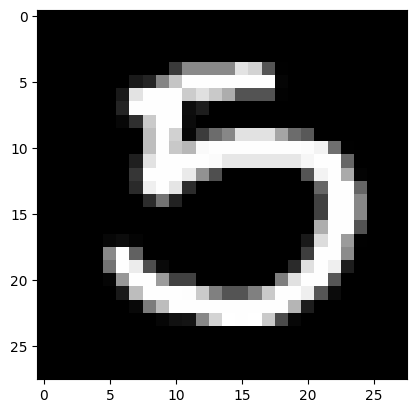

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted class: 5


In [30]:
# Choose an image index from the test set
image_index = 352  # Change this index to select a different image
single_image = x_test[image_index]

# Display the image
plt.imshow(single_image, cmap='gray')
plt.show()

# Prepare the image for the model by adding an extra dimension
single_image = np.expand_dims(single_image, axis=0)

# Predict the class of the selected image
predictions = model.predict(single_image)

# Find the class with the highest probability
predicted_class = np.argmax(predictions[0])

print(f'Predicted class: {predicted_class}')

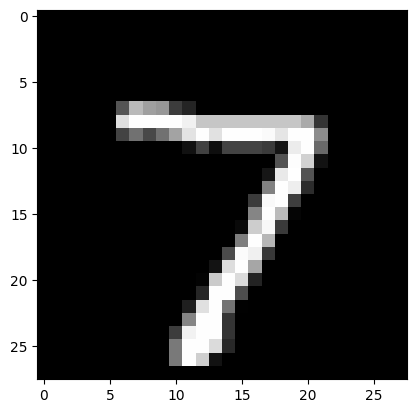

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Predicted class: 7


In [31]:
# Choose an image index from the test set
image_index = 0  # Change this index to select a different image
single_image = x_test[image_index]

# Display the image
plt.imshow(single_image, cmap='gray')
plt.show()

# Prepare the image for the model by adding an extra dimension
single_image = np.expand_dims(single_image, axis=0)

# Predict the class of the selected image
predictions = model.predict(single_image)

# Find the class with the highest probability
predicted_class = np.argmax(predictions[0])

print(f'Predicted class: {predicted_class}')